In [4]:
import praw
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

In [9]:
user_agent = 'Reddit_Scrapper 1.0 by /u//FeatureChoice5036'
reddit = praw.Reddit(
 client_id='',
 client_secret='',
 user_agent=user_agent
)   

In [ ]:
# Hot new rising topics
headlines = set()
for submission in reddit.subreddit('bitcoin').hot(limit=None):
    print(submission.title) # Subreddit Title
    print(submission.id) #ID
    print(submission.author) # Author of the subreddit
    print(submission.created_utc) # Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    headlines.add(submission.title)
    break

print(len(headlines))

In [15]:
headlines = set()
for submission in reddit.subreddit('bitcoin').hot(limit=None):
    headlines.add(submission.title)
    
print(len(headlines))

812


In [16]:
#Create a dataframe from the scrapped data 
bitcoin_df = pd.DataFrame(headlines)
bitcoin_df.head()

,0
0,Would you advise your son to buy crypto?
1,"In my opinion, the most difficult seed to hack"
2,During the next bull-run we need to tell peopl...
3,sMiles App is a waste of time.
4,What wallet allows small transfers?


In [20]:
bitcoin_df.columns = ['Titles']
bitcoin_df.head()

,Titles
0,Would you advise your son to buy crypto?
1,"In my opinion, the most difficult seed to hack"
2,During the next bull-run we need to tell peopl...
3,sMiles App is a waste of time.
4,What wallet allows small transfers?


In [21]:
bitcoin_df.Titles.duplicated().sum() # Duplicate count for Tweet

0

In [23]:
#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0–9]+', '', text) # Remove @mentions replace with blank
    text = re.sub(r'#', '', text) # Remove the '#’ symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) # Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) # Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    return text

#Cleaning the text
bitcoin_df['Titles'] = bitcoin_df['Titles'].apply(cleanTxt)
                               
#Show the clean text
bitcoin_df.head()

,Titles
0,Would you advise your son to buy crypto?
1,"In my opinion, the most difficult seed to hack"
2,During the next bull-run we need to tell peopl...
3,sMiles App is a waste of time.
4,What wallet allows small transfers?


In [24]:
#Next we have to remove emoji & Unicode from the Tweet data.
def remove_emoji(string):
    emoji_pattern = re.compile('['
    u'\U0001F600-\U0001F64F' # emoticons
    u'\U0001F300-\U0001F5FF' # symbols & pictographs
    u'\U0001F680-\U0001F6FF' # transport & map symbols
    u'\U0001F1E0-\U0001F1FF' # flags (iOS)
    u'\U00002500-\U00002BEF' # chinese char
    u'\U00002702-\U000027B0'
    u'\U00002702-\U000027B0'
    u'\U000024C2-\U0001F251'
    u'\U0001f926-\U0001f937'
    u'\U00010000-\U0010ffff'
    u'\u2640-\u2642'
    u'\u2600-\u2B55'
    u'\u200d'
    u'\u23cf'
    u'\u23e9'
    u'\u231a'
    u'\ufe0f' # dingbats
    u'\u3030'
    ']+', flags=re.UNICODE)

    return emoji_pattern.sub(r'', string)

#Cleaning the text
bitcoin_df['Titles']= bitcoin_df['Titles'].apply(remove_emoji)

#Show the clean text
bitcoin_df.head()

,Titles
0,Would you advise your son to buy crypto?
1,"In my opinion, the most difficult seed to hack"
2,During the next bull-run we need to tell peopl...
3,sMiles App is a waste of time.
4,What wallet allows small transfers?


## Sentiment analysis

In [26]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [27]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text): 
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
bitcoin_df['Subjectivity'] = bitcoin_df['Titles'].apply(getSubjectivity)                                    
bitcoin_df['Polarity'] = bitcoin_df['Titles'].apply(getPolarity)
                                   
#Now display data
bitcoin_df.head()

,Titles,Subjectivity,Polarity
0,Would you advise your son to buy crypto?,0.00000,0.00000
1,"In my opinion, the most difficult seed to hack",0.75000,0.00000
2,During the next bull-run we need to tell peopl...,0.28125,-0.10625
3,sMiles App is a waste of time.,0.00000,-0.20000
4,What wallet allows small transfers?,0.40000,-0.25000


In [28]:
#Group the range of Polarity into different categories
def getInsight(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

bitcoin_df['Insight'] = bitcoin_df['Polarity'].apply(getInsight)
bitcoin_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Would you advise your son to buy crypto?,0.000000,0.000000,Neutral
1,"In my opinion, the most difficult seed to hack",0.750000,0.000000,Neutral
2,During the next bull-run we need to tell peopl...,0.281250,-0.106250,Negative
3,sMiles App is a waste of time.,0.000000,-0.200000,Negative
4,What wallet allows small transfers?,0.400000,-0.250000,Negative
5,BitVM question,0.000000,0.000000,Neutral
6,Is reddit a good source to learn about bitcoin?,0.600000,0.700000,Positive
7,The Bitcoin Frontier Global bitcoin fever with...,0.000000,0.000000,Neutral
8,Could more people do what satoshi did?,0.500000,0.500000,Positive
9,BTC in Argentina with Gemni,0.000000,0.000000,Neutral


## Data visualization - Sentiment analysis dashboard

In [30]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

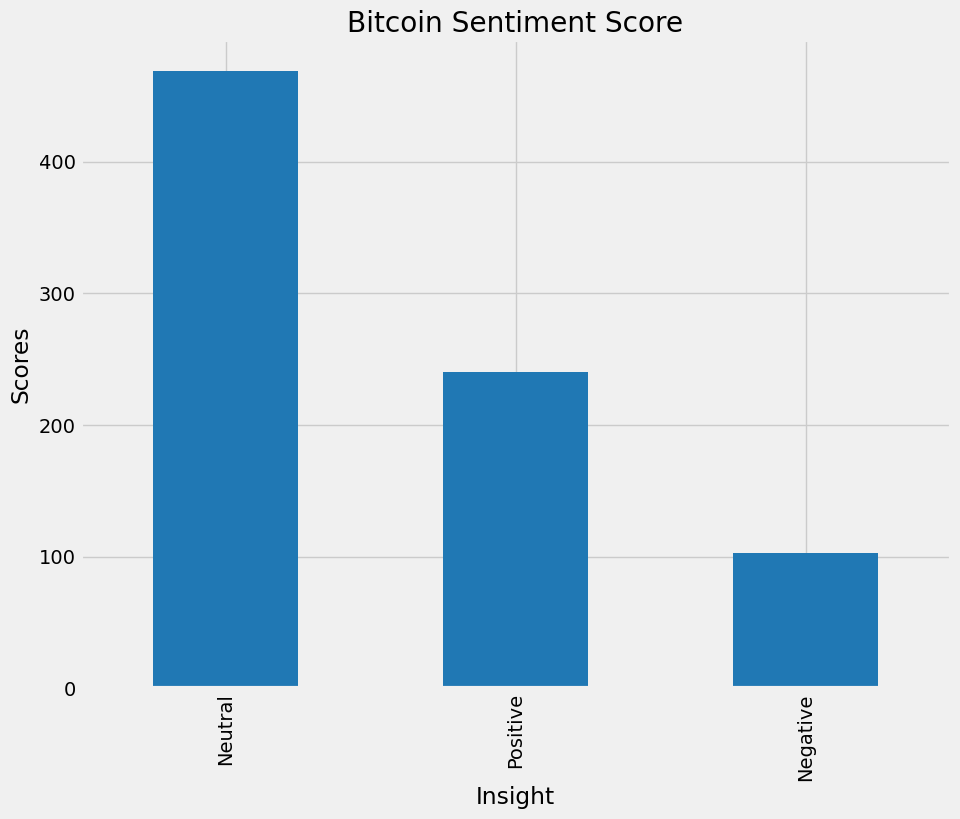

In [44]:
#Plot the values count of sentiment
plt.title('Bitcoin Sentiment Score')
plt.xlabel('Sentiment')
plt.ylabel('Scores')
plt.rcParams['figure.figsize'] = (10, 8)

bitcoin_df['Insight'].value_counts().plot(kind='bar', color='#2078B4')
plt.show()